### Load necessary modules

In [2]:
!conda install eqtools

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - eqtools

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch
  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
import mrc
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
from skimage import measure
from PIL import Image
from eqtools.trispline import Spline
%matplotlib inline

C:\Users\chens\Anaconda3\envs\cv\lib\site-packages\scipy\__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.11.3)
  UserWarning)


ModuleNotFoundError: No module named 'eqtools'

### Load Protein Data

In [2]:
mrc_lr2 = mrc.readMRC('VSRCNN-lr2_bs80.mrc')
mrc_lr3 = mrc.readMRC('VSRCNN-lr3_bs80.mrc')
mrc_lr4 = mrc.readMRC('VSRCNN-lr4_bs80.mrc')
mrc_lr5 = mrc.readMRC('VSRCNN-lr5_bs80.mrc')

In [3]:
files = os.listdir('./mrc_files')
path = './mrc_files/'
mrc_list = []
for f in files:
    print f
    _mrc = mrc.readMRC(path+f)
    mrc_list.append(_mrc)

pdb1a3n.mrc
pdb1b0b.mrc
pdb1kr7.mrc
pdb1mab.mrc
pdb1v07.mrc
pdb1xz2.mrc
pdb2bk9.mrc
pdb2gl3.mrc
pdb2in4.mrc
pdb2r4w.mrc
pdb2r4z.mrc
pdb2vyy.mrc
pdb2xkg-test.mrc
pdb2xkg-test2.mrc
pdb2xkg.mrc
pdb2xki.mrc
pdb2z85.mrc
pdb2z8a.mrc
pdb3a5a.mrc
pdb3a5b.mrc
pdb3arj.mrc
pdb3g4u.mrc
pdb3g4y.mrc
pdb3g53.mrc
pdb3ogb.mrc
pdb3qjb.mrc
pdb3s5i.mrc
pdb3uhb.mrc
pdb3uhg.mrc
pdb3uhk.mrc
pdb3uhq.mrc
pdb3uhv.mrc
pdb3uhx.mrc
pdb3uhz.mrc
pdb4f6f.mrc
pdb4f6j.mrc
pdb4hbi.mrc
pdb4hrt.mrc
pdb4kjt.mrc
pdb4max.mrc
pdb5ab8.mrc
pdb5hbi.mrc
pdb5kd1.mrc
pdb5ksi.mrc
pdb6hbi.mrc


### Compute PSNR between Tricubic interpolation and GT (ground truth)

In [16]:
#protein = mrc.readMRC('mrc_files/pdb6hbi.mrc')
protein = mrc_list[-1]
tricubic = scipy.ndimage.interpolation.zoom(protein, (1./2), prefilter=False)
tricubic = scipy.ndimage.interpolation.zoom(tricubic, (2/1.), prefilter=False)

#### Shape

In [17]:
print "Grount Truth Shape: %s" % (str(protein.shape))
print "Tricubic Shape: %s" % (str(tricubic.shape))
print "Learning rate of 10^-2: %s" % (str(mrc_lr2[8:126-8, 8:126-8, 8:126-8].shape))
print "Learning rate of 10^-3: %s" % (str(mrc_lr3[8:126-8, 8:126-8, 8:126-8].shape))
print "Learning rate of 10^-4: %s" % (str(mrc_lr4[8:126-8, 8:126-8, 8:126-8].shape))
print "Learning rate of 10^-5: %s" % (str(mrc_lr5[8:126-8, 8:126-8, 8:126-8].shape))

Grount Truth Shape: (110, 110, 110)
Tricubic Shape: (110, 110, 110)
Learning rate of 10^-2: (110, 110, 110)
Learning rate of 10^-3: (110, 110, 110)
Learning rate of 10^-4: (110, 110, 110)
Learning rate of 10^-5: (110, 110, 110)


#### PSNR

In [18]:
print "Tricubic: %s" % measure.compare_psnr(protein, tricubic[:,:, :], data_range=15.724161)
print "10^-2:    %s" % measure.compare_psnr(protein, mrc_lr2[8:126-8, 8:126-8, 8:126-8], data_range=15.724161)
print "10^-3:    %s" % measure.compare_psnr(protein, mrc_lr3[8:126-8, 8:126-8, 8:126-8], data_range=15.724161)
print "10^-4:    %s" % measure.compare_psnr(protein, mrc_lr4[8:126-8, 8:126-8, 8:126-8], data_range=15.724161)
print "10^-5:    %s" % measure.compare_psnr(protein, mrc_lr5[8:126-8, 8:126-8, 8:126-8], data_range=15.724161)

Tricubic: 34.8373562742
10^-2:    32.7299477294
10^-3:    32.4688241638
10^-4:    33.0724873402
10^-5:    33.1701529612



### Plot 

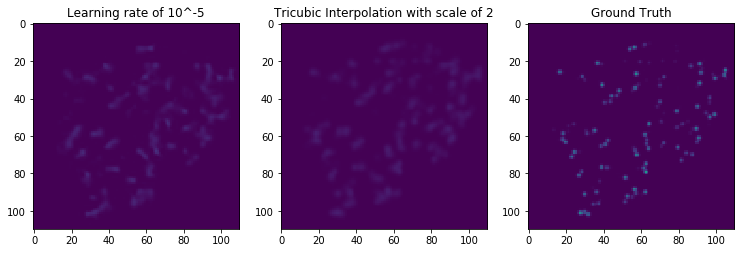

In [22]:
vmin_orig = protein.min()
vmax_orig = protein.max()
vmin = vmin_orig + 0*(vmax_orig-vmin_orig)
vmax = vmax_orig - 0.1*(vmax_orig-vmin_orig)

fig = plt.figure(figsize=(17, 5))
ax1 = plt.subplot(1, 4, 1)
ax2 = plt.subplot(1, 4, 2)
ax3 = plt.subplot(1, 4, 3)
ax1.imshow(mrc_lr5[8:126-8, 8:126-8, 8:126-8][mrc_lr5[8:126-8, 8:126-8, 8:126-8].shape[0]/2, :, :],vmin=vmin,vmax=vmax)
ax1.set_title("Learning rate of 10^-5")
ax2.imshow(tricubic[tricubic.shape[0]/2, :, :],vmin=vmin,vmax=vmax)
ax2.set_title("Tricubic Interpolation with scale of 2")
ax3.imshow(protein[protein.shape[0]/2, :, :],vmin=vmin,vmax=vmax)
ax3.set_title("Ground Truth")